# Clase 7

## Datos continuos

In [1]:
import pandas as pd

df = pd.read_csv('Clase7 CSV.csv')
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [8]:
df.isnull().sum()
df.dropna(axis= 1)
df.dropna(thresh=4)
df.dropna(subset=['D'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0


In [9]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [6]:
df.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

In [10]:
import numpy as np
from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

## Tipos de variables

## Datos categóricos

In [11]:
df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
['red', 'L', 13.5, 'class1'],
['blue', 'XL', 15.3, 'class2']])
df.columns = ['color', 'size', 'price', 'class_label']
df

,color,size,price,class_label
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [12]:
size_mapping = {'XL': 3,'L': 2,'M': 1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,class_label
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [13]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['class_label']))}
class_mapping

{'class1': 0, 'class2': 1}

In [14]:
df['class_label'] = df['class_label'].map(class_mapping)
df

,color,size,price,class_label
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [15]:
y = df.iloc[:,3].values
y

array([1, 0, 1], dtype=int64)

In [16]:
X = df[['color', 'size', 'price']].values
X

array([['green', 1, 10.1],
       ['red', 2, 13.5],
       ['blue', 3, 15.3]], dtype=object)

In [17]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit_transform(X).toarray()

array([[0., 1., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 1.]])

In [18]:
X = pd.get_dummies(df[['price', 'size', 'color']]).values
X

array([[10.1,  1. ,  0. ,  1. ,  0. ],
       [13.5,  2. ,  0. ,  0. ,  1. ],
       [15.3,  3. ,  1. ,  0. ,  0. ]])

In [19]:
print('Variables de entrada:\n',X)
print('Estiquetas de clase:\n',y)

Variables de entrada:
 [[10.1  1.   0.   1.   0. ]
 [13.5  2.   0.   0.   1. ]
 [15.3  3.   1.   0.   0. ]]
Estiquetas de clase:
 [1 0 1]


## Base de datos 'real'

In [20]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
'Alcalinity of ash', 'Magnesium', 'Total phenols',
'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
'Proline']
df_wine

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [24]:
df_wine.describe(include = 'all')

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [22]:
print('Etiquetas de clase', np.unique(df_wine['Class label']))

Etiquetas de clase [1 2 3]


In [23]:
df_wine.isnull().sum()

Class label                     0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [25]:
df_wine.iloc[:,0] = df_wine.iloc[:,0].astype('category')

In [26]:
df_wine.describe(include='all')

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.0,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
unique,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,NaN,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,NaN,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,NaN,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,NaN,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,NaN,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000


In [27]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0, stratify=y)

### Normalización

In [28]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
print(X_train_norm.min())
print(X_train_norm.max())
print(X_test_norm.min())
print(X_test_norm.max())

0.0
1.0
-0.2222222222222222
1.3085106382978724


### Estandarización

In [29]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
print(X_train_std.min())
print(X_train_std.max())
print(X_test_std.min())
print(X_test_std.max())

-2.55493448916567
3.6932366525105946
-3.823226471542036
4.4758333270522215


### Estudiando las variables para reducir la complejidad del Modelo

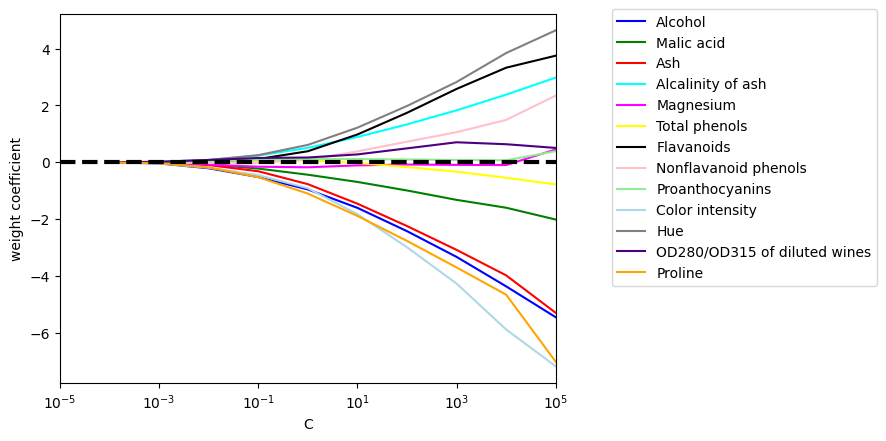

In [31]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan',
'magenta', 'yellow', 'black',
'pink', 'lightgreen', 'lightblue',
'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l2', C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
        label=df_wine.columns[column + 1],
        color=color)

plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
bbox_to_anchor=(1.38, 1.03),
ncol=1, fancybox=True)
#plt.savefig('images/04_07.png', dpi=300,
# bbox_inches='tight', pad_inches=0.2)
plt.show()

c:\Users\acer\anaconda3\envs\analisis_datos\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\acer\anaconda3\envs\analisis_datos\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\acer\anaconda3\envs\analisis_datos\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\acer\anaconda3\envs\analisis_datos\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\acer\anaconda3\envs\analisis_datos\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\acer\a

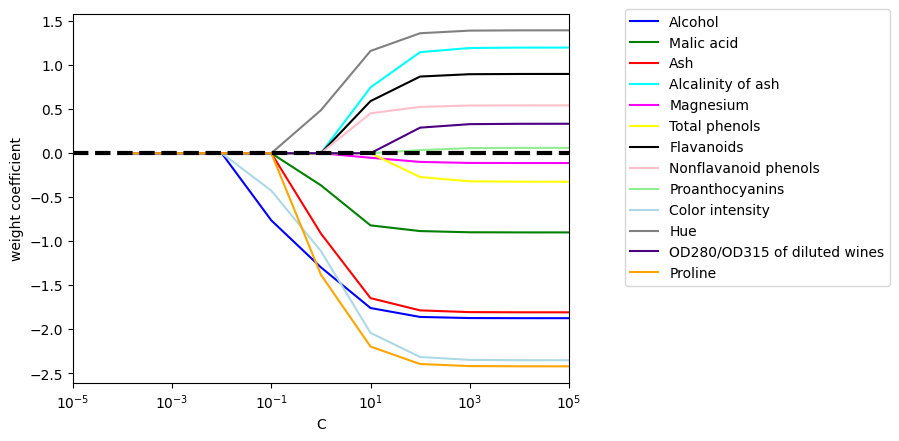

In [32]:
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan',
'magenta', 'yellow', 'black',
'pink', 'lightgreen', 'lightblue',
'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, random_state=0,solver='saga')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
        label=df_wine.columns[column + 1],
        color=color)

plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
bbox_to_anchor=(1.38, 1.03),
ncol=1, fancybox=True)
#plt.savefig('images/04_07.png', dpi=300,
# bbox_inches='tight', pad_inches=0.2)
plt.show()

### SBS

In [33]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
class SBS():
    def __init__(self, estimator, k_features,scoring=accuracy_score,test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=self.test_size,
        random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,X_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train,X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score
    
    


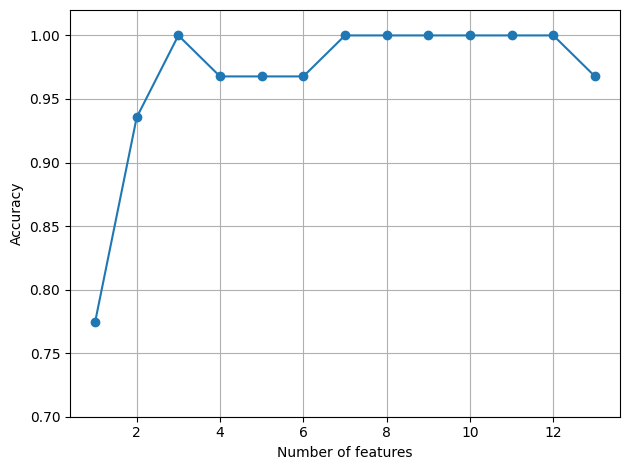

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)
# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('images/04_08.png', dpi=300)
plt.show()

In [35]:
sbs.subsets_

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12),
 (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11),
 (0, 1, 2, 3, 4, 5, 6, 7, 9, 11),
 (0, 1, 2, 3, 4, 5, 7, 9, 11),
 (0, 1, 2, 3, 5, 7, 9, 11),
 (0, 1, 2, 3, 5, 7, 11),
 (0, 1, 2, 3, 5, 11),
 (0, 1, 2, 3, 11),
 (0, 1, 2, 11),
 (0, 1, 11),
 (0, 11),
 (0,)]

In [36]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.967741935483871
Test accuracy: 0.9629629629629629


In [37]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


In [38]:
knn.fit(X_train_std[:, k3], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k3], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k3], y_test))

Training accuracy: 0.9516129032258065
Test accuracy: 0.9259259259259259


### TAREA: 
Implementar un programa que selecciona un subgrupo de características de
manera aleatoria (que incluya una semilla).